$$
\mu=\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}
$$



Substitute $\mu$ into the equation:
$$
\theta^2-2 \theta \frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}+\left(\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2
$$



Multiplying through by $-\frac{1}{2}(\tau+n \phi)$ :
$$
-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)
$$


Rearrange the equation, which can be written as:

$$
\exp\left(-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)\right)
$$


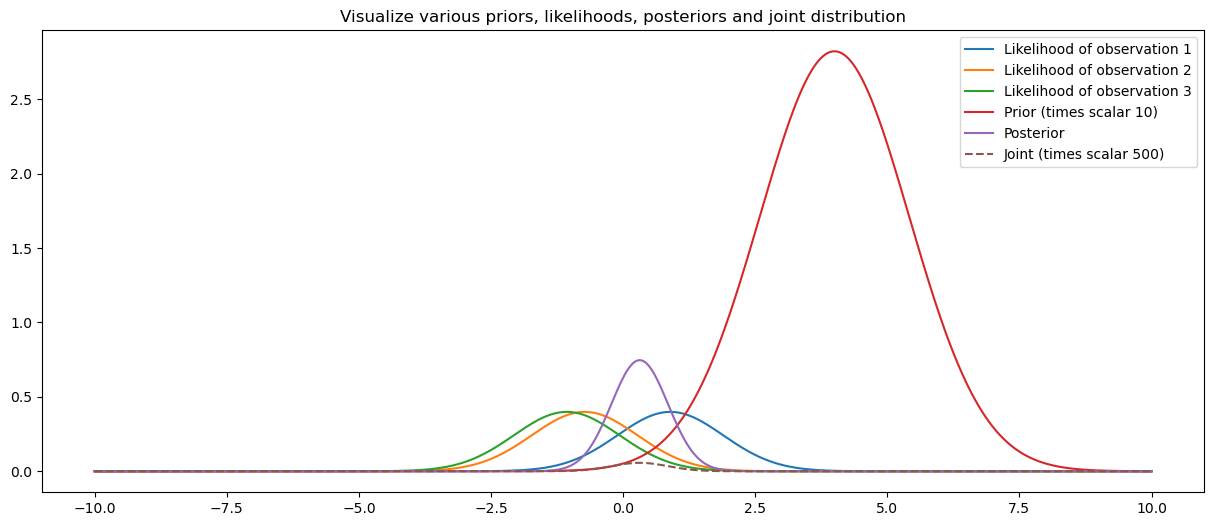

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# parameter
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter = np.linspace(-10, 10, 1001)

# likelihood
likelihood = [stats.norm.pdf(parameter, loc=xi, scale=1) for xi in x]

# prior
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter) 

# joint distribution
joint = 500 * np.prod(likelihood, axis=0) * prior

# posterior
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter)

plt.figure(figsize=(15, 6))

for i, individual_likelihood in enumerate(likelihood):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}")

plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")
plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")

plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors and joint distribution")

plt.show()

In [19]:
x

array([1.04894509, 1.90588665, 0.65405365])

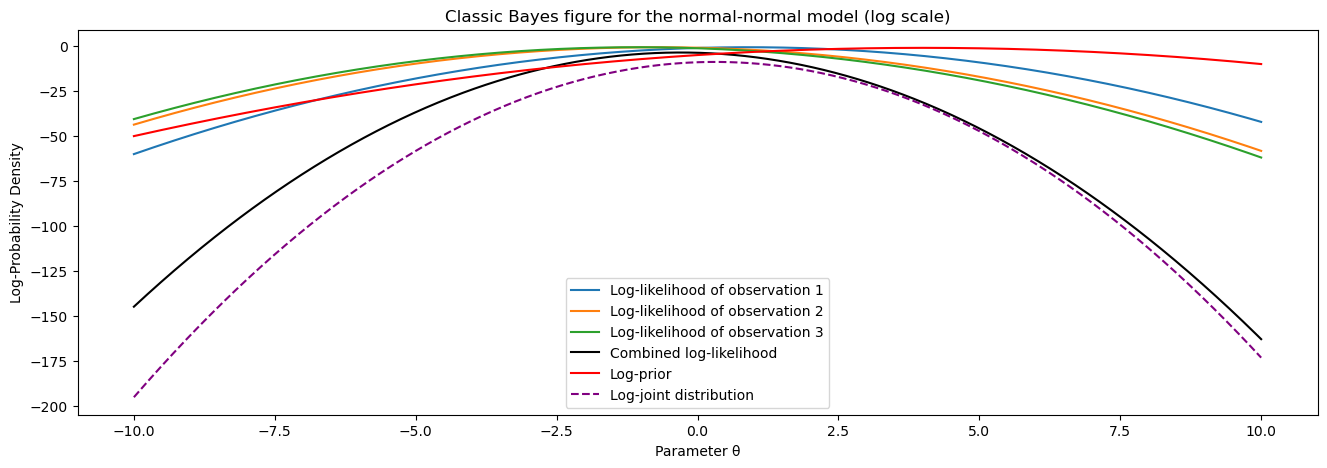

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# normal-normal model
n = 3  # number of observation
theta_0, tau = 4, 1/2  # hyperparameter
phi = 1  

parameter_domain = np.linspace(-10, 10, 1001)

log_likelihood = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])

combined_log_likelihood = log_likelihood.sum(axis=0)

log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

log_joint = combined_log_likelihood + log_prior

plt.figure(figsize=(16, 5))


for i, log_likelihood in enumerate(log_likelihood):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {i+1}")

plt.plot(parameter_domain, combined_log_likelihood, label="Combined log-likelihood", color='black')
plt.plot(parameter_domain, log_prior, label="Log-prior", color='red')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='purple', linestyle='--')

plt.ylabel("Log-Probability Density")
plt.xlabel("Parameter θ")
plt.title("Classic Bayes figure for the normal-normal model (log scale)")
plt.legend()

plt.show()


The normal likelihood:

$$
p(x \mid \theta, \phi)=\prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

With a uniform prior $p(\theta) \propto 1$, the posterior distribution $p(\theta \mid x)$ is proportional to the likelihood function:
$$
p(\theta \mid x) \propto e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}
$$

This is a normal distribution WRT $\theta$


$$
\sum_{i=1}^n\left(x_i-\theta\right)^2=n \bar{x}^2-2 n \bar{x} \theta+n \theta^2
$$

Where $\bar{x}$ is the sample mean of the data $x$

$$
-\frac{\phi}{2}\left[n \theta^2-2 n \bar{x} \theta+n \bar{x}^2\right]=-\frac{\phi}{2}\left[n\left(\theta^2-2 \bar{x} \theta+\bar{x}^2\right)\right]=-\frac{\phi}{2} n(\theta-\bar{x})^2
$$

This gives us the posterior distribution:
$$
\theta \mid x \sim \mathcal{N}\left(\bar{x}, \sigma^2 / n\right)
$$

**Log Likelihoods**: These remain unaffected by the selection of the prior, whether it is proper or improper. They are solely determined by the data and the parameters of the model.

**Posterior Distributions**: These arise from the multiplication of the likelihood and the prior. When the prior is improper, there is a risk of obtaining an improper posterior, lacking integration to one and thus not constituting a valid probability distribution. However, if the likelihood contains ample information, it can effectively supersede the impact of the improper prior, resulting in a proper posterior.

**Marginal Likelihood Constants**: These serve the purpose of normalizing the posterior, ensuring its integration equals one and forming a valid probability distribution. When an improper prior is involved, the significance of the marginal likelihood, also referred to as the evidence, becomes crucial in determining the propriety of the posterior.